### Problem Statement- To identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

In [1]:
#import all libraries- 
#numpy for numerical operations 
#pandas for dataframe operations 
#matplotlib and seaborn for data visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the Aerofit_treadmill comma seperated file and create dataframe

df=pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
#gives the shape of dataframe
df.shape

(180, 9)

In [4]:
#gives bird eye view of complete dataframe.
df.info()

#cols are object type and integer type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.7+ KB


In [5]:
#describes statistical summary of dataframe.
#count of no. of records,mean of continuous values,std,
#min continuous value, max continuous value etc

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
#gives descrption of object type of data

df.describe(include=object)

#Product has 3 categories, Gender and Marital Status has 2 categories.

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [7]:
#This dataframe doesnt contain any null values...So no need to handle them

df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
# Converting Age, Miles and Income in different bins to get proper insight

df['Age_bins'] = pd.cut(x=df['Age'], bins=[15,20, 25, 30, 35,40,45,50])
df['Miles_bins'] = pd.cut(x=df['Miles'], bins=[0,50,100,150,200,250,300,350])
df['Income_bins'] = pd.cut(x=df['Income'], bins=[25000,35000,45000,55000,65000,75000,85000,95000,105000])
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Miles_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,"(15, 20]","(100, 150]","(25000, 35000]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(15, 20]","(50, 100]","(25000, 35000]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(15, 20]","(50, 100]","(25000, 35000]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(15, 20]","(50, 100]","(25000, 35000]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(15, 20]","(0, 50]","(35000, 45000]"


C:\Users\pinki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


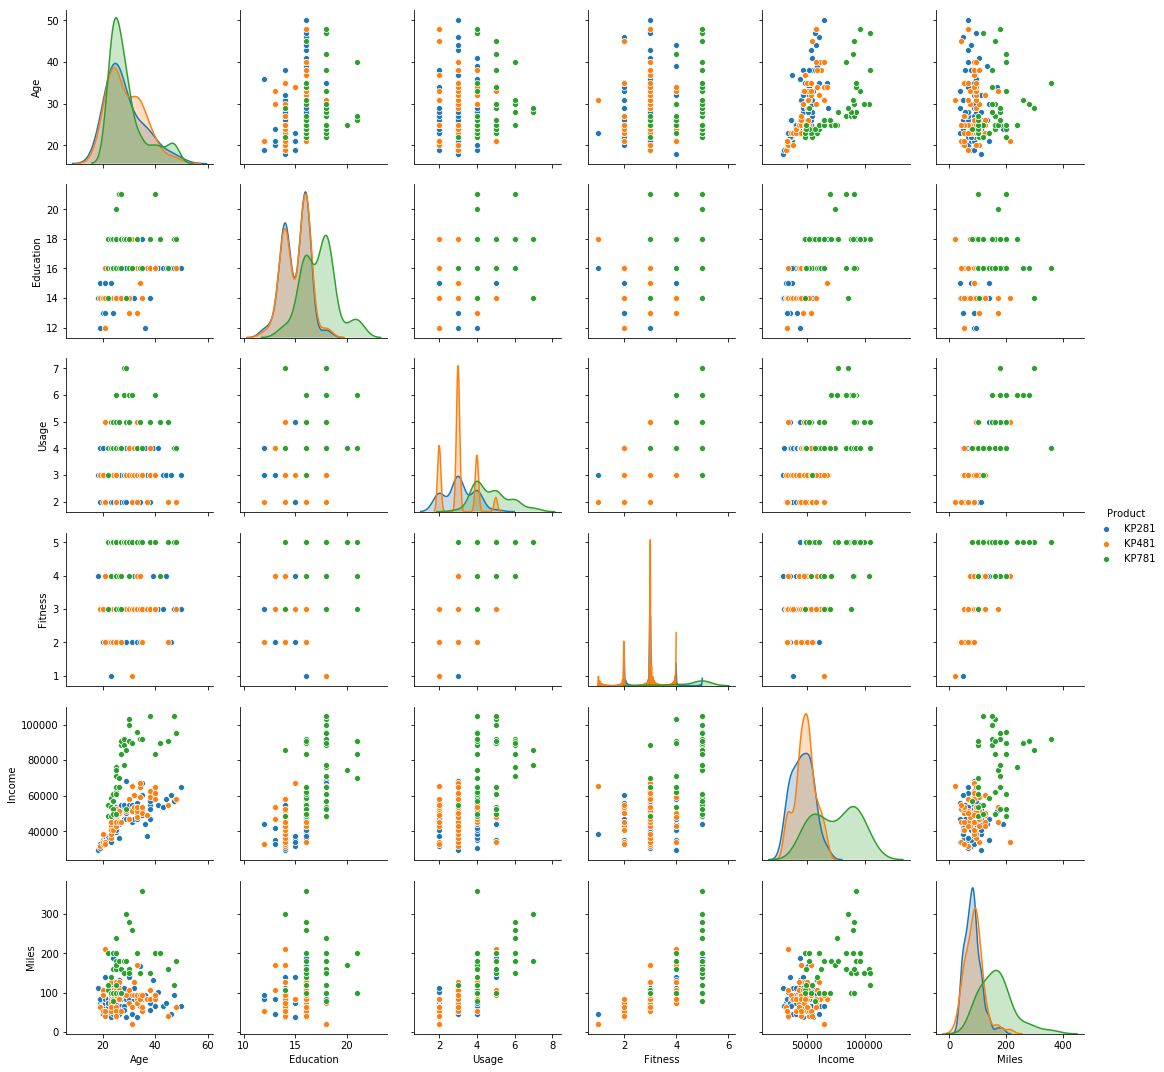

In [9]:
#pair plot gives overall correlation between all features of dataframe

sns.pairplot(df,hue="Product")

### Non-Graphical Analysis: Value counts and unique attributes

In [10]:
#gives unique no. of values for each column

df.nunique().to_frame()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37
Age_bins,7


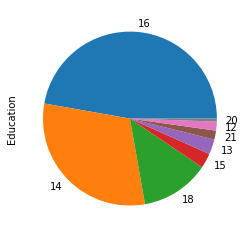

In [11]:
# College(16 years of education) going students are more lean towards fitness

df["Education"].value_counts().plot(kind="pie")

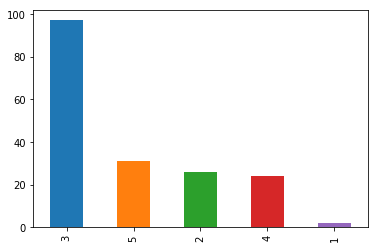

In [12]:
# High percentage of people are at 3rd(good) place in fitness scale of (1(poor)..........5(Excellent))

df["Fitness"].value_counts().plot(kind="bar")

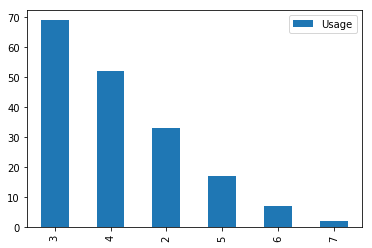

In [13]:
# 3 days in a week is the most frequent times people uses treadmill

df["Usage"].value_counts().to_frame().plot(kind="bar")


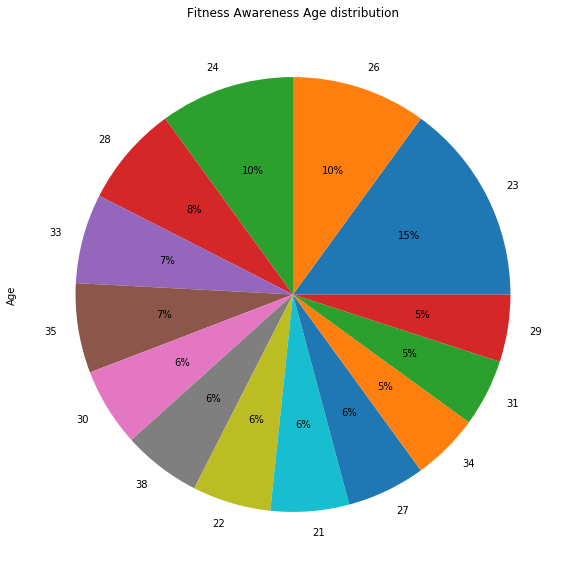

In [14]:
#Age 23 to 26 people are most aware of fitness

df["Age"].value_counts()[1:15,].plot(kind="pie",figsize=(10,10),title="Fitness Awareness Age distribution",autopct='%1.0f%%')

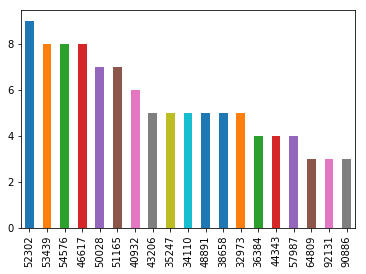

In [15]:
#maximum people are in average shape.
#very few people are in bad shape.

df["Income"].value_counts()[1:20,].plot(kind="bar")

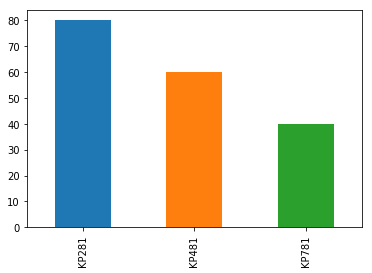

In [16]:
#Most commonly used treadmill is KP281

df["Product"].value_counts().plot(kind="bar")

Bivariate Analysis

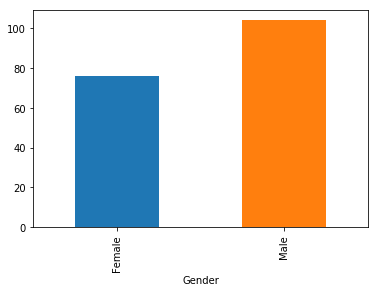

In [17]:
#Males use more treadmills

df.groupby("Gender").count()["Product"].plot(kind="bar")

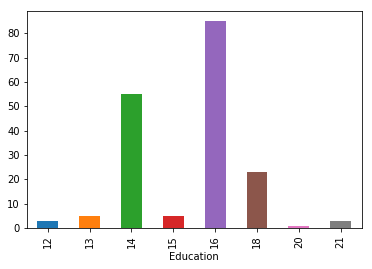

In [18]:
#College going people are more treadmill users

df.groupby("Education").count()["Product"].plot(kind="bar")

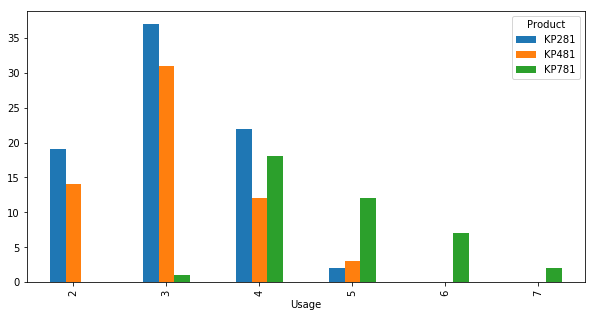

In [19]:
#People whose average usage of treadmill is 2,3 times a week prefers 281 and 481...and who uses on daily basis prefers 781.

df.groupby("Usage")["Product"].value_counts().sort_values(ascending=False).unstack().plot(kind="bar",figsize=(10,5))

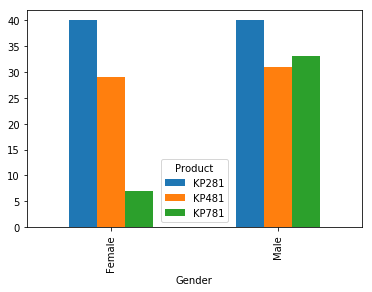

In [20]:
# KP 781 is mostly use by Males

df.groupby(["Gender","Product"]).count()["Age"].unstack().plot(kind="bar")

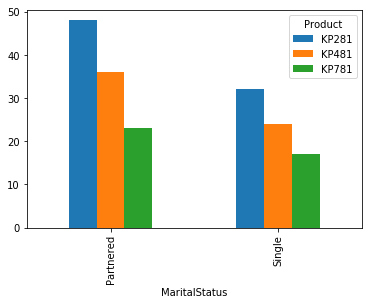

In [21]:
#Partenered people uses all treadmills more than Unmarried people

df.groupby("MaritalStatus")["Product"].value_counts().unstack().plot(kind="bar")

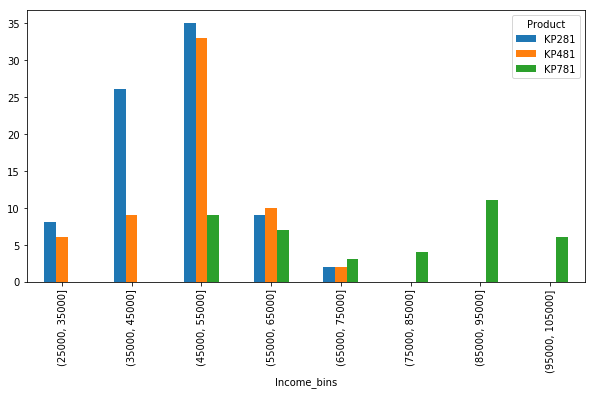

In [22]:
#says that KP281 and KP481 used by people having income within 25000-75000.
#says that KP781 used by people having high income within 55000-105000.
# High income people only prefers KP781.

df.groupby("Income_bins")["Product"].value_counts().sort_values(ascending=False).unstack().plot(kind="bar",figsize=(10,5))

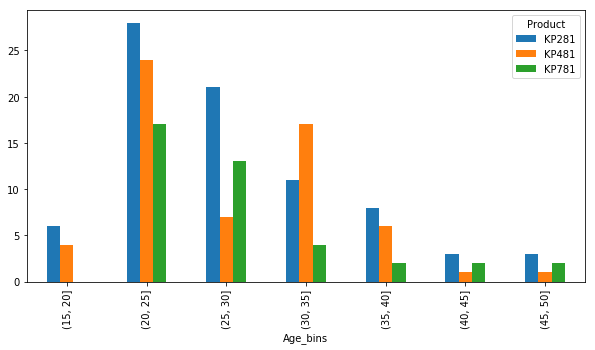

In [23]:
#says that KP281,KP481,KP781 is most popular in 20-25 age group

df.groupby("Age_bins")["Product"].value_counts().sort_values(ascending=False).unstack().plot(kind="bar",figsize=(10,5))

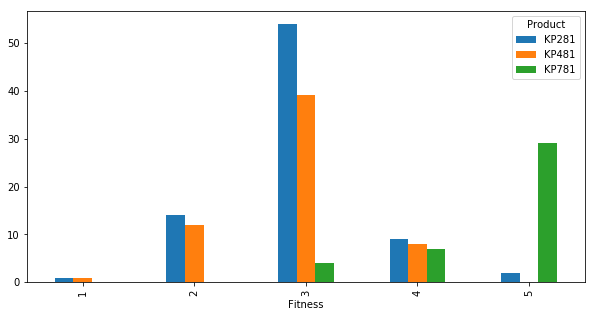

In [24]:
#People with Excellent fitness use KP781.
#People who are having average fitness uses KP281 which is affordable also.
#Entry level treadmill also good for people need average fitness

df.groupby("Fitness")["Product"].value_counts().sort_values(ascending=False).unstack().plot(kind="bar",figsize=(10,5))

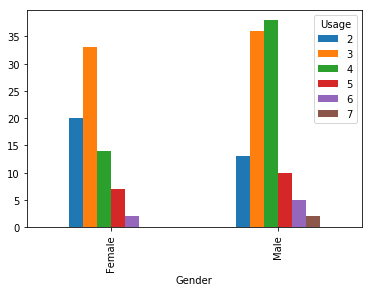

In [25]:
# Most of the Male have average treadmill usage of 3-4 times in a week 
# Most of the Female have average treadmill usage of 2-3 times in a week 

df.groupby("Gender")["Usage"].value_counts().unstack().plot(kind="bar")

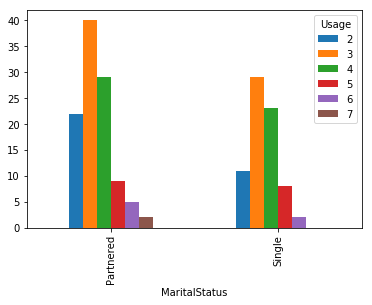

In [26]:
# Most of the partenered have average treadmill usage of 3-4 times in a week 

df.groupby("MaritalStatus")["Usage"].value_counts().unstack().plot(kind="bar")

### Probability of different events

Probability between Age range and Products

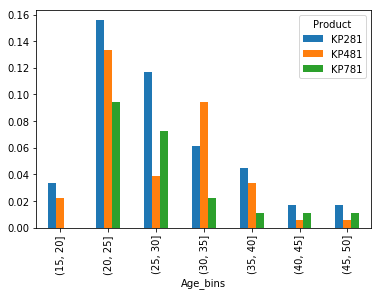

In [27]:
# Joint probability distribution among Age range and Products

table1=pd.crosstab(df["Age_bins"], df["Product"],normalize=True)
table1
table1.plot(kind="bar")

In [28]:
def conditional_prob(P,A):
    a=table1.iloc[A]
    num=a.iloc[P] 
    den=a.sum()
    return num/den

In [29]:
print("Probability of product KP281 given the person within age of 20-25 years",conditional_prob(0,1))
print("Probability of product KP281 given the person within age of 25-30 years",conditional_prob(0,2))

print("Probability of product KP481 given the person within age of 20-25 years",conditional_prob(1,1))
print("Probability of product KP481 given the person within age of 35-40 years",conditional_prob(1,4))

print("Probability of product KP781 given the person within age of 20-25 years",conditional_prob(2,1))
print("Probability of product KP781 given the person within age of 25-30 years",conditional_prob(2,2))

#Probability of product KP281 given age of person within 20-25 is high
#Probability of product KP481 given age of person within 35-40 is high
#Probability of product KP781 given age of person within 25-30 is high

Probability of product KP281 given the person within age of 20-25 years 0.4057971014492754
Probability of product KP281 given the person within age of 25-30 years 0.5121951219512195
Probability of product KP481 given the person within age of 20-25 years 0.3478260869565218
Probability of product KP481 given the person within age of 35-40 years 0.375
Probability of product KP781 given the person within age of 20-25 years 0.2463768115942029
Probability of product KP781 given the person within age of 25-30 years 0.31707317073170727


Probability between MaritalStatus and Products

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.266667,0.200000,0.127778
Single,0.177778,0.133333,0.094444


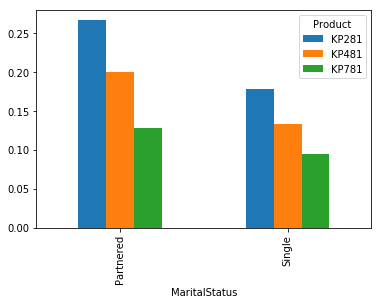

In [30]:
#gives the joint probability of Product and MaritalStatus

table2=pd.crosstab(df["MaritalStatus"],df["Product"],normalize=True)
table2.plot(kind="bar")
table2
#Partenered couple have high probability to buy all three Treadmill.


In [31]:
def conditional_prob(P,MS):
    a=table2.iloc[MS]
    num=a.iloc[P] 
    den=a.sum()
    return num/den

In [32]:
# Conditional Probability of products given Marital Status

print("Proability of Product KP281 given the person is Single is",conditional_prob(P=0,MS=1))
print("Proability of Product KP281 given the person is partnered is",conditional_prob(P=0,MS=0))
print("Proability of Product KP481 given the person is Single is",conditional_prob(P=1,MS=1))
print("Proability of Product KP481 given the person is partnered is",conditional_prob(P=1,MS=0))
print("Proability of Product KP781 given the person is Single is",conditional_prob(P=2,MS=1))
print("Proability of Product KP781 given the person is partnered is",conditional_prob(P=2,MS=0))


# If the given person is partnered, probability of product Kp281 is 0.44, KP481 is 0.336,KP781 is 0.21
# If the given person is partnered, probability of product Kp281 is 0.438,KP481 is 0.328,KP781 is 0.2328

Proability of Product KP281 given the person is Single is 0.4383561643835617
Proability of Product KP281 given the person is partnered is 0.4485981308411215
Proability of Product KP481 given the person is Single is 0.3287671232876712
Proability of Product KP481 given the person is partnered is 0.33644859813084116
Proability of Product KP781 given the person is Single is 0.2328767123287671
Proability of Product KP781 given the person is partnered is 0.21495327102803738


Probability between Fitness and Products

Product,KP281,KP481,KP781
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


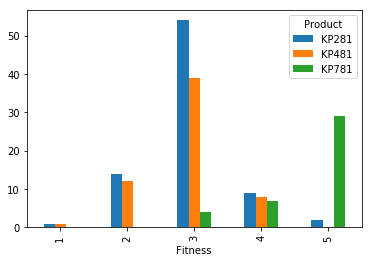

In [33]:
table3=pd.crosstab(df["Fitness"],df["Product"])
table3.plot(kind="bar")
table3

In [34]:
def conditional_prob(P,F):
    a=table3.iloc[F]
    num=a.iloc[P] 
    den=a.sum()
    return num/den

In [35]:
print("Probability of product KP481 given 1(poor) level fitness is ",conditional_prob(P=1,F=0))
print("Probability of product KP281 given 1(poor) level fitness is ",conditional_prob(P=0,F=0))
print("Probability of product KP281 given 2(below average) level fitness is ",conditional_prob(P=0,F=1))
print("Probability of product KP281 given 3(average) level fitness is ",conditional_prob(P=0,F=2))
print("Probability of product KP281 given 4(good) level fitness is ",conditional_prob(P=0,F=3))
print("Probability of product KP781 given 5(excellent) level fitness is ",conditional_prob(P=2,F=4))

# If the given fitness is poor, probability of product Kp281 is 0.5, KP481 is 0.5
# If the given person is partnered, probability of product Kp281 is 0.438,KP481 is 0.328,KP781 is 0.2328

Probability of product KP481 given 1(poor) level fitness is  0.5
Probability of product KP281 given 1(poor) level fitness is  0.5
Probability of product KP281 given 2(below average) level fitness is  0.5384615384615384
Probability of product KP281 given 3(average) level fitness is  0.5567010309278351
Probability of product KP281 given 4(good) level fitness is  0.375
Probability of product KP781 given 5(excellent) level fitness is  0.9354838709677419


Probability between Usage and Products

In [36]:
#joint distribution of the variables Product and Usage
table4=pd.crosstab(df["Usage"],df["Product"],normalize=True)
table4

Product,KP281,KP481,KP781
Usage,,,
2,0.105556,0.077778,0.000000
3,0.205556,0.172222,0.005556
4,0.122222,0.066667,0.100000
5,0.011111,0.016667,0.066667
6,0.000000,0.000000,0.038889
7,0.000000,0.000000,0.011111


In [37]:
def conditional_prob(P,U):
    a=table4.iloc[U]
    num=a.iloc[P] 
    den=a.sum()
    return num/den

In [38]:
print("Probability of product Kp281 given usage 2 days per week is ",conditional_prob(P=0,U=0))
print("Probability of product Kp281 given usage 3 days per week is ",conditional_prob(P=0,U=1))
print("Probability of product Kp281 given usage 4 days per week is ",conditional_prob(P=0,U=2))
print("Probability of product Kp781 given usage 5 days per week is ",conditional_prob(P=2,U=3))
print("Probability of product Kp781 given usage 6 days per week is ",conditional_prob(P=2,U=4))
print("Probability of product Kp781 given usage 7 days per week is ",conditional_prob(P=2,U=5))

# Conditional Probability of Products given Usage per week


Probability of product Kp281 given usage 2 days per week is  0.5757575757575757
Probability of product Kp281 given usage 3 days per week is  0.5362318840579711
Probability of product Kp281 given usage 4 days per week is  0.42307692307692313
Probability of product Kp781 given usage 5 days per week is  0.7058823529411765
Probability of product Kp781 given usage 6 days per week is  1.0
Probability of product Kp781 given usage 7 days per week is  1.0


Probability between Gender and Products

Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


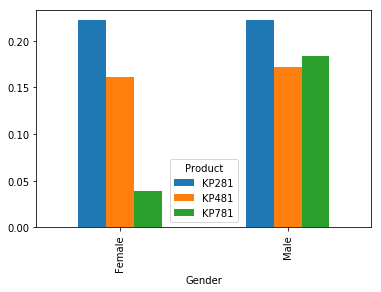

In [39]:
table5=pd.crosstab(df["Gender"],df["Product"],normalize=True)
table5.plot(kind="bar")
table5

In [40]:
def conditional_prob(P,G):
    a=table5.iloc[G]
    num=a.iloc[P] 
    den=a.sum()
    return num/den

In [41]:
print("Probability of product Kp281 given person is female is",conditional_prob(P=0,G=0))
print("Probability of product Kp281 given person is Male is",conditional_prob(P=0,G=1))

Probability of product Kp281 given person is female is 0.5263157894736843
Probability of product Kp281 given person is Male is 0.38461538461538464


Conditional Probability between MaritalStatus,Product and gender

In [42]:
df1=df.loc[df["MaritalStatus"]=="Partnered",["Product","Gender"]]

In [43]:
tab2=pd.crosstab(df1.Gender,df1.Product,normalize=True)
tab2

Product,KP281,KP481,KP781
Gender,,,
Female,0.252336,0.140187,0.037383
Male,0.196262,0.196262,0.177570


In [44]:
# P(KP281|Partnered Female)
def conditional_prob(P,G):
    a=tab2.iloc[G]
    num=a.iloc[P] 
    den=a.sum()
    return num/den

In [45]:
print("Probability of product Kp281 is high if the person is partnered female",conditional_prob(P=0,G=0))

# Probability of all product is almost same if the person is partnered Male
print("Probability of product Kp281 is almost same if the person is partnered Male",conditional_prob(P=0,G=1))
print("Probability of product Kp481 is almost same if the person is partnered Male",conditional_prob(P=1,G=1))
print("Probability of product Kp781 is almost same if the person is partnered Male",conditional_prob(P=2,G=1))

Probability of product Kp281 is high if the person is partnered female 0.5869565217391305
Probability of product Kp281 is almost same if the person is partnered Male 0.3442622950819672
Probability of product Kp481 is almost same if the person is partnered Male 0.3442622950819672
Probability of product Kp781 is almost same if the person is partnered Male 0.3114754098360656


### Business Insights

1.Most commonly used treadmill is KP281
2.Males use more treadmills and KP781 is the most commonly used by them.
3.Partenered people uses all treadmills more than Unmarried people.
4.KP281 and KP481 used by people having income within 25000-75000 and KP781 used by people having high income within 55000-105000.
5.People whose average usage of treadmill is 2,3 times a week prefers 281 and 481 and people uses on daily basis prefers 781.
6.KP281,KP481,KP781 is most popular in 20-30 age group
7.People with Excellent fitness use KP781 and People who are having average fitness uses KP281 and KP481.
8.People who are graduated (16 years of education) are more lean towards fitness.
9.High percentage of people are at 3rd(good) place in fitness scale of (1(poor)..........5(Excellent))
10.Age 23 to 26 people are most aware of fitness.
11.Probability of product given age of person, given 20-25 age -KP281 have high prob,for 35-40age KP481 have high prob,for 25-30age -KP781 have high prob.
12.If the given person is partnered, probability of product Kp281 is 0.44, KP481 is 0.336,KP781 is 0.21
13.If the given person is Single, probability of product Kp281 is 0.438,KP481 is 0.328,KP781 is 0.2328
14.If the given fitness is poor, probability of product Kp281 is 0.5, KP481 is 0.5 for fitness 2 probability of Kp281 is 0.538 for fitness 3 pro of Kp281 is 0.55, for fitness 4 prob of Kp 281 is 0.375 for fitness 5 prob of Kp781 is highest i.e. 0.9354
15.If the given person is partnered, probability of product Kp281 is 0.438,KP481 is 0.328,KP781 is 0.2328.


### Recommendations


1.Recommend to focus on properties like Partnered, Male,20-30 age group, Average fitness, 16 yrs educated,3 days per week usage, income between 46k to 56k will be beneficial.
2.More focus on graduated males for product KP781 will give more business. 
3.Recommend to keep an eye on Age-group 20-30yr for all three treadmill as per the income range  such as for 25000-75000 income/month refer them Kp281 and Kp481, for 75000 above refer them KP781
4.If the fitness level of person is 1, refer them KP281 and Kp481, for 2,3 and 4 refer them KP281, for 5 refer them KP 781.
5.If the usage of product is 2,3,4 days per week, refer them Kp281 and Kp481 or 5,6,7 days per week then refer Kp781.
6.If the person is partnered female refer her Kp281, and if the person is partnered male then there is almost same probability of buying all three types of treadmills.
7.Focus more on KP281,Kp781 as this treadmill is most commonly used so its more saleable product.